In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import micom_tools

First create an object of the `micom_tools` class. We'll use the methods from this object to do our computation.

In [2]:
mtool = micom_tools.micom_tools()

Navigate to the right directory.

In [3]:
working_dir = "../model_test/"

To load output data, use the `read_output` method, which returns the data as an xarray.DataArray object, or as a NumPy array.

If you put your cursor behind the opening bracking of `read_output(` and press `shift + tab`, you will see the docstring of the method, which contains some hints on how to use this function. You may also simply view `micom_tools.py` itself.

In [4]:
average = mtool.read_output(working_dir+"average_00005", returntype='xarray')

The `merge_along_time` tool takes a list of DataArrays and merges them along a time dimension. 

In [5]:
n = 16
analysis_files = [working_dir+f"analysis_000{i:02d}" for i in range(1,n+1)]
analyses = mtool.merge_along_time(analysis_files)

The `harmonic_analysis` method takes a `DataArray` of the merged analysis files (with time dimension) and a `DataArray` of the average output (no time dimension). It returns the amplitude, phase and residual. See section 10.6 of the lecture notes.

In [6]:
amplitude, phase, residual = mtool.harmonic_analysis(analyses, average)

Xarray allows you to easily plot the data:

/Users/4302001/miniconda3/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


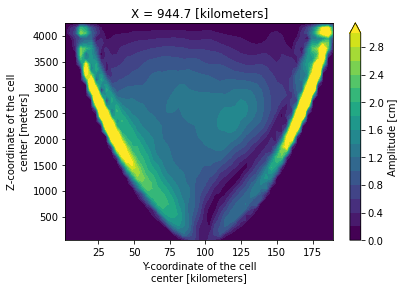

In [7]:
amplitude.sel(X=945, method='nearest').plot.contourf(levels=np.arange(0,3.2, 0.2))

/Users/4302001/miniconda3/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


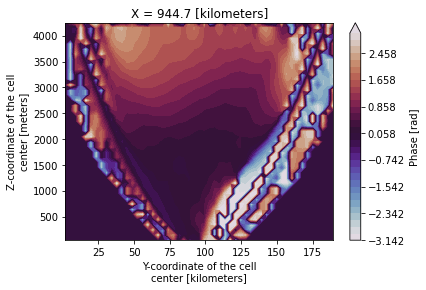

In [8]:
phase.sel(X=945, method='nearest').plot.contourf(levels=np.arange(-np.pi,np.pi, 0.2), 
                                                 cmap='twilight')

/Users/4302001/miniconda3/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


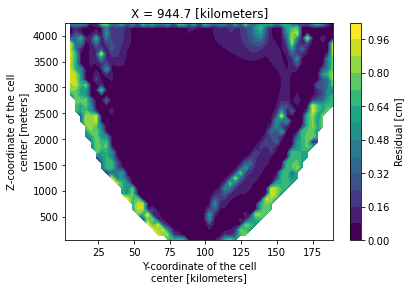

In [9]:
residual.sel(X=945, method='nearest').plot.contourf(levels=16)